- 2차 모델 저장

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

# Class Imbalance import
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from tqdm import tqdm

In [5]:
# Seed 고정
seed = 1
np.random.seed(seed)

In [6]:
# 원본 데이터 준비

df_org = pd.read_csv('data/multi_classification_data.csv')
df_org.shape

(1941, 34)

In [7]:
encoding_list = ['TypeOfSteel_A300', 'TypeOfSteel_A400']

# 오디날 인코딩 수행
df_org['Type_of_Steel'] = df_org[encoding_list].idxmax(axis=1).apply(lambda x: encoding_list.index(x))

# 오디날 인코딩된 컬럼 삭제
df_org = df_org.drop(encoding_list, axis=1)

# 결과 출력
print(df_org['Type_of_Steel'])

0       0
1       0
2       0
3       1
4       1
       ..
1936    1
1937    1
1938    1
1939    1
1940    0
Name: Type_of_Steel, Length: 1941, dtype: int64


In [8]:
target_list = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

# 오디날 인코딩 수행
df_org['Target'] = df_org[target_list].idxmax(axis=1).apply(lambda x: target_list.index(x))

# 오디날 인코딩된 컬럼 삭제
df_org = df_org.drop(target_list, axis=1)

# 결과 출력
print(df_org['Target'])

0       0
1       0
2       0
3       0
4       0
       ..
1936    6
1937    6
1938    6
1939    6
1940    6
Name: Target, Length: 1941, dtype: int64


In [9]:
# Index / log 컬럼 삭제 데이터 준비
df_org.columns[12:25]

Index(['Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object')

In [10]:
columns_to_drop = [i for i in range(12, 25)]
df_sel_org = df_org.drop(columns=df_org.columns[columns_to_drop])
df_sel_org

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,Steel_Plate_Thickness,Type_of_Steel,Target
0,42,50,270900,270944,267,17,44,24220,76,108,1687,80,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,80,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,100,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,290,1,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,185,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,1360,40,1,6
1937,144,175,340581,340598,287,44,24,34599,112,133,1360,40,1,6
1938,145,174,386779,386794,292,40,22,37572,120,140,1360,40,1,6
1939,137,170,422497,422528,419,97,47,52715,117,140,1360,40,1,6


In [11]:
# 'Target' 컬럼이 5 또는 6인 행만 추출
df = df_org[(df_org['Target'] == 5) | (df_org['Target'] == 6)]
df_selected = df_sel_org[(df_sel_org['Target'] == 5) | (df_sel_org['Target'] == 6)]


In [12]:
df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Type_of_Steel,Target
866,38,49,735612,735624,113,11,12,12652,93,130,...,1.0000,1.0,2.0531,1.0414,1.0792,0.0833,-0.1253,0.2432,0,5
867,1252,1348,355940,356016,1812,119,135,196003,82,132,...,0.5630,0.0,3.2582,1.9823,1.8808,-0.2083,-0.1549,1.0000,0,5
868,1095,1102,3028545,3028556,41,8,11,4533,100,123,...,1.0000,1.0,1.6128,0.8451,1.0414,0.3636,-0.1362,0.1822,0,5
869,193,210,612201,612252,588,18,51,62182,73,135,...,1.0000,1.0,2.7694,1.2305,1.7076,0.6667,-0.1738,0.9774,1,5
870,1159,1170,32914,32926,106,11,12,12792,100,134,...,1.0000,1.0,2.0253,1.0414,1.0792,0.0833,-0.0572,0.2432,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,1,6
1937,144,175,340581,340598,287,44,24,34599,112,133,...,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,1,6
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,1,6
1939,137,170,422497,422528,419,97,47,52715,117,140,...,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,1,6


In [13]:
df_selected

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,Steel_Plate_Thickness,Type_of_Steel,Target
866,38,49,735612,735624,113,11,12,12652,93,130,1707,100,0,5
867,1252,1348,355940,356016,1812,119,135,196003,82,132,1687,80,0,5
868,1095,1102,3028545,3028556,41,8,11,4533,100,123,1467,120,0,5
869,193,210,612201,612252,588,18,51,62182,73,135,1353,290,1,5
870,1159,1170,32914,32926,106,11,12,12792,100,134,1353,185,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,1360,40,1,6
1937,144,175,340581,340598,287,44,24,34599,112,133,1360,40,1,6
1938,145,174,386779,386794,292,40,22,37572,120,140,1360,40,1,6
1939,137,170,422497,422528,419,97,47,52715,117,140,1360,40,1,6


In [14]:
# 행들을 뒤죽박죽으로 섞기
df = df.sample(frac=1, random_state=42)
df_selected = df_selected.sample(frac=1, random_state=42)

### 데이터셋 분리 (train / val / test)

In [15]:
# target / feature 분리

target = 'Target'

x_org = df.drop(target, axis=1)
y_org = df[target]

x_sel = df_selected.drop(target, axis=1)
y_sel = df_selected[target]

In [16]:
## 데이터셋 분리 (train / val / test)

print('--------------------<원본 데이터셋>')

x_train, x_test, y_train, y_test = train_test_split(x_org, y_org, test_size=0.1, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

print(f'train data : x{x_train.shape}, y{y_train.shape}')
print(f'val data : x{x_val.shape}, y{y_val.shape}')
print(f'test data : x{x_test.shape}, y{y_test.shape}')


print()
print('--------------------<col selected 데이터셋>')

x_train_sel, x_test_sel, y_train_sel, y_test_sel = train_test_split(x_sel, y_sel, test_size=0.1, random_state=1)
x_train_sel, x_val_sel, y_train_sel, y_val_sel = train_test_split(x_train_sel, y_train_sel, test_size=0.1, random_state=1)

print(f'train data : x{x_train_sel.shape}, y{y_train_sel.shape}')
print(f'val data : x{x_val_sel.shape}, y{y_val_sel.shape}')
print(f'test data : x{x_test_sel.shape}, y{y_test_sel.shape}')


--------------------<원본 데이터셋>
train data : x(870, 26), y(870,)
val data : x(97, 26), y(97,)
test data : x(108, 26), y(108,)

--------------------<col selected 데이터셋>
train data : x(870, 13), y(870,)
val data : x(97, 13), y(97,)
test data : x(108, 13), y(108,)


## Model 선택 (df data)

In [17]:
# 손실값 계산 함수 (수정 중)
def compute_loss(y_true, y_pred):
    M = len(y_true)
    N = 1 if isinstance(y_pred, (int, float)) else np.array(y_pred).shape[1]
    square_sum = np.sum(np.square(y_true - np.array(y_pred)))
    loss = square_sum / (M * N)
    
    return loss

# 정확도 반환 함수
def eval_models(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    
    return accuracy

In [18]:
def train_val_score(model):
    y_train_pred = model.predict(x_train)
    y_val_pred = model.predict(x_val)

    model_eval = pd.DataFrame(index=['Accuracy', 'Loss'], columns=['Train', 'Val'])
    model_eval['Train'] = eval_models(y_train, y_train_pred)
    model_eval['Val'] = eval_models(y_val, y_val_pred)
    
    display(model_eval)
    return model_eval

In [19]:
# 기준모델
base = y_train.mode()[0]
baseline = [base] * len(y_train)

# 모델별 score
eval_table = pd.DataFrame(index=['Accuracy'], 
                          columns=['Baseline', 'Logistic', 'KNN', 'naivebayes', 'DecisionTree', 'RandomForest', 'XGB'])
eval_table['Baseline'] = eval_models(y_train, baseline)
eval_table

,Baseline,Logistic,KNN,naivebayes,DecisionTree,RandomForest,XGB
Accuracy,0.627586,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# LogisticRegression

logistic = make_pipeline(
    OneHotEncoder(),
    StandardScaler(),
    LogisticRegression(random_state = 1))

logistic.fit(x_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=1))])

In [21]:
# train-val score
train_val_score(logistic)

# 모델별 score
y_val_pred = logistic.predict(x_val)
eval_table['Logistic'] = eval_models(y_val, y_val_pred)
eval_table

,Train,Val
Accuracy,0.758621,0.701031
Loss,0.758621,0.701031


,Baseline,Logistic,KNN,naivebayes,DecisionTree,RandomForest,XGB
Accuracy,0.627586,0.701031,NaN,NaN,NaN,NaN,NaN


In [22]:
# KNN

knn = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2))

knn.fit(x_train, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [23]:
# train-val score
train_val_score(knn)

# 모델별 score
y_val_pred = knn.predict(x_val)
eval_table['KNN'] = eval_models(y_val, y_val_pred)
eval_table

c:\Users\PSY\anaconda3\envs\teamproject1\lib\site-packages\joblib\externals\loky\backend\context.py:130: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\PSY\anaconda3\envs\teamproject1\lib\site-packages\joblib\externals\loky\backend\context.py", line 251, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\PSY\anaconda3\envs\teamproject1\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\PSY\anaconda3\envs\teamproject1\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\PSY\anaconda3\envs\teamproject1\lib\subprocess.py", line 1327, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executab

,Train,Val
Accuracy,0.822989,0.71134
Loss,0.822989,0.71134


,Baseline,Logistic,KNN,naivebayes,DecisionTree,RandomForest,XGB
Accuracy,0.627586,0.701031,0.71134,NaN,NaN,NaN,NaN


In [24]:
# naivebayes

nb = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    GaussianNB())

nb.fit(x_train, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

In [25]:
# train-val score
train_val_score(nb)

# 모델별 score
y_val_pred = nb.predict(x_val)
eval_table['naivebayes'] = eval_models(y_val, y_val_pred)
eval_table

,Train,Val
Accuracy,0.57931,0.618557
Loss,0.57931,0.618557


,Baseline,Logistic,KNN,naivebayes,DecisionTree,RandomForest,XGB
Accuracy,0.627586,0.701031,0.71134,0.618557,NaN,NaN,NaN


In [26]:
# DecisionTreeClassifier

decisiontree = make_pipeline(
    OrdinalEncoder(),
    DecisionTreeClassifier(random_state = 1))

decisiontree.fit(x_train, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=1))])

In [27]:
# train-val score
train_val_score(decisiontree)

# 모델별 score
y_val_pred = decisiontree.predict(x_val)
eval_table['DecisionTree'] = eval_models(y_val, y_val_pred)
eval_table

,Train,Val
Accuracy,1.0,0.742268
Loss,1.0,0.742268


,Baseline,Logistic,KNN,naivebayes,DecisionTree,RandomForest,XGB
Accuracy,0.627586,0.701031,0.71134,0.618557,0.742268,NaN,NaN


In [28]:
# RandomForestClassifier

randomforest = RandomForestClassifier(random_state = 1)

randomforest.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [29]:
# train-val score
train_val_score(randomforest)

# 모델별 score
y_val_pred = randomforest.predict(x_val)
eval_table['RandomForest'] = eval_models(y_val, y_val_pred)
eval_table

,Train,Val
Accuracy,1.0,0.783505
Loss,1.0,0.783505


,Baseline,Logistic,KNN,naivebayes,DecisionTree,RandomForest,XGB
Accuracy,0.627586,0.701031,0.71134,0.618557,0.742268,0.783505,NaN


## Model 선택 (df_selected data)

In [31]:
x_train = x_train_sel
y_train = y_train_sel
x_val = x_val_sel
y_val = y_val_sel
x_test = x_test_sel
y_test = y_test_sel

In [32]:
# 기준모델
base = y_train.mode()[0]
baseline = [base] * len(y_train)

# 모델별 score
eval_table = pd.DataFrame(index=['Accuracy'], 
                          columns=['Baseline', 'Logistic', 'KNN', 'naivebayes', 'DecisionTree', 'RandomForest', 'XGB'])
eval_table['Baseline'] = eval_models(y_train, baseline)
eval_table

,Baseline,Logistic,KNN,naivebayes,DecisionTree,RandomForest,XGB
Accuracy,0.627586,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# LogisticRegression

logistic = make_pipeline(
    OneHotEncoder(),
    StandardScaler(),
    LogisticRegression(random_state = 1))

logistic.fit(x_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=1))])

In [34]:
# train-val score
train_val_score(logistic)

# 모델별 score
y_val_pred = logistic.predict(x_val)
eval_table['Logistic'] = eval_models(y_val, y_val_pred)
eval_table

,Train,Val
Accuracy,0.695402,0.742268
Loss,0.695402,0.742268


,Baseline,Logistic,KNN,naivebayes,DecisionTree,RandomForest,XGB
Accuracy,0.627586,0.742268,NaN,NaN,NaN,NaN,NaN


In [35]:
# KNN

knn = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2))

knn.fit(x_train, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [36]:
# train-val score
train_val_score(knn)

# 모델별 score
y_val_pred = knn.predict(x_val)
eval_table['KNN'] = eval_models(y_val, y_val_pred)
eval_table

,Train,Val
Accuracy,0.828736,0.690722
Loss,0.828736,0.690722


,Baseline,Logistic,KNN,naivebayes,DecisionTree,RandomForest,XGB
Accuracy,0.627586,0.742268,0.690722,NaN,NaN,NaN,NaN


In [37]:
# naivebayes

nb = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    GaussianNB())

nb.fit(x_train, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

In [38]:
# train-val score
train_val_score(nb)

# 모델별 score
y_val_pred = nb.predict(x_val)
eval_table['naivebayes'] = eval_models(y_val, y_val_pred)
eval_table

,Train,Val
Accuracy,0.544828,0.56701
Loss,0.544828,0.56701


,Baseline,Logistic,KNN,naivebayes,DecisionTree,RandomForest,XGB
Accuracy,0.627586,0.742268,0.690722,0.56701,NaN,NaN,NaN


In [39]:
# DecisionTreeClassifier

decisiontree = make_pipeline(
    OrdinalEncoder(),
    DecisionTreeClassifier(random_state = 1))

decisiontree.fit(x_train, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=1))])

In [40]:
# train-val score
train_val_score(decisiontree)

# 모델별 score
y_val_pred = decisiontree.predict(x_val)
eval_table['DecisionTree'] = eval_models(y_val, y_val_pred)
eval_table

,Train,Val
Accuracy,1.0,0.762887
Loss,1.0,0.762887


,Baseline,Logistic,KNN,naivebayes,DecisionTree,RandomForest,XGB
Accuracy,0.627586,0.742268,0.690722,0.56701,0.762887,NaN,NaN


In [41]:
# RandomForestClassifier

randomforest = RandomForestClassifier(random_state = 1)

randomforest.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [42]:
# train-val score
train_val_score(randomforest)

# 모델별 score
y_val_pred = randomforest.predict(x_val)
eval_table['RandomForest'] = eval_models(y_val, y_val_pred)
eval_table

,Train,Val
Accuracy,1.0,0.835052
Loss,1.0,0.835052


,Baseline,Logistic,KNN,naivebayes,DecisionTree,RandomForest,XGB
Accuracy,0.627586,0.742268,0.690722,0.56701,0.762887,0.835052,NaN


Selected Data / RandomForest 또는 xgb로 결정

## Class Imbalance 해결

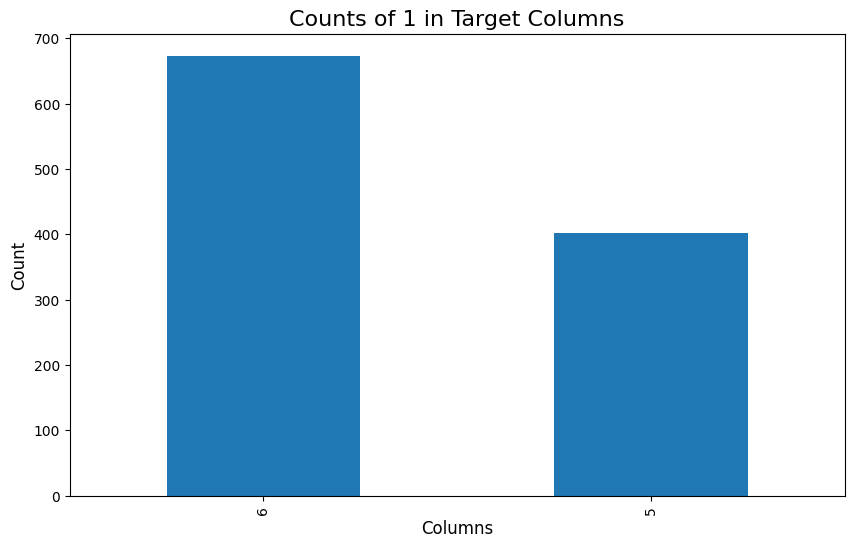

In [43]:
# target 분포 확인

# 컬럼별 1의 갯수 세기
counts = df_selected['Target'].value_counts()

# 시각화
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
counts.plot(kind='bar')  # 막대 그래프로 시각화
plt.title("Counts of 1 in Target Columns", fontsize=16)  # 그래프 제목 설정
plt.xlabel("Columns", fontsize=12)  # x축 레이블 설정
plt.ylabel("Count", fontsize=12)  # y축 레이블 설정
plt.show()  # 그래프 출력


In [44]:
u_sampler = RandomUnderSampler(random_state=1)
x_train_u, y_train_u = u_sampler.fit_resample(x_train, y_train)

o_sampler = RandomOverSampler(random_state=1)
x_train_o, y_train_o = o_sampler.fit_resample(x_train, y_train)

smote = SMOTE(random_state=1)
x_train_s, y_train_s = smote.fit_resample(x_train, y_train)

In [45]:
def sampling_score(model):
    
    print(f'MODEL : {model}')
    
    x_samples = [x_train_u, x_train_o, x_train_s]
    y_samples = [y_train_u, y_train_o, y_train_s]
    sample_eval = pd.DataFrame(index=['Accuracy'], columns=['Under', 'Over', 'SMOTE'])
    
    for i, x, y in zip(range(3), x_samples, y_samples):
        model.fit(x, y)
        y_val_pred = model.predict(x_val)
        
        sample_eval[sample_eval.columns[i]] = eval_models(y_val, y_val_pred)

    return sample_eval

In [46]:
sampling_score(randomforest)


MODEL : RandomForestClassifier(random_state=1)


,Under,Over,SMOTE
Accuracy,0.762887,0.804124,0.814433


In [47]:
sampling_score(xgb)

MODEL : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [5 6]

In [ ]:
# 컨퓨전 리포트 출력
xgb.fit(x_train_o, y_train_o)
y_val_pred = xgb.predict(x_val)
report = classification_report(y_val, y_val_pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        37
           1       0.86      0.85      0.86        60

    accuracy                           0.82        97
   macro avg       0.81      0.82      0.82        97
weighted avg       0.83      0.82      0.83        97



SMOTETomek 이용

In [49]:
from imblearn.combine import SMOTETomek

x_resampled, y_resampled = SMOTETomek().fit_resample(x_train, y_train) #데이터 증강
print(x_resampled.shape, y_resampled.shape)


(878, 13) (878,)


In [50]:
randomforest.fit(x_resampled, y_resampled)
y_val_pred = randomforest.predict(x_val)
report = classification_report(y_val, y_val_pred)
print(report)

              precision    recall  f1-score   support

           5       0.77      0.81      0.79        37
           6       0.88      0.85      0.86        60

    accuracy                           0.84        97
   macro avg       0.82      0.83      0.83        97
weighted avg       0.84      0.84      0.84        97



In [51]:
x_resampled.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'Steel_Plate_Thickness', 'Type_of_Steel'],
      dtype='object')

# 모델 저장

In [53]:
import joblib
joblib.dump(randomforest, 'steelplate_model2.pkl')

['steelplate_model2.pkl']